运行较久，大约需40多分钟，python做数值运算确实比matlab和C要慢一点

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
h1 = 1/100
h2 = 1/50
T = 1
dt = 1/100
w = 1.98
mu = 0.001

Omg = np.zeros((101,101))
Phi = np.zeros((101,101))

x = np.linspace(0,1,101)

vT = np.sin(np.pi * x) ** 2
vB = np.zeros(101)
vL = np.zeros(101)
vR = np.zeros(101) 

err = 1e-8
maxiter = 30000
Omg_err =10
iter =0

while Omg_err > err and iter < maxiter:
    iter += 1
    
    #更新边界条件
    for i in range(0, 101):
        Omg[0, i] = -2 * (Phi[1, i] - Phi[0, i] + vL[i] * h1) / h1 ** 2 
        Omg[-1, i] = -2 * (Phi[-2, i] - Phi[-1, i] + vR[i] * h1) / h1 ** 2 
    for j in range(0, 101):
        Omg[j, 0] = -2 * (Phi[j, 1] - Phi[j, 0] + vB[j] * h1) / h1 ** 2  
        Omg[j, -1] = -2 * (Phi[j, -2] - Phi[j, -1] + vT[j] * h1) / h1 ** 2
        
    #更新涡量场
    Omg_former =Omg.copy()
    for i in range(1,100):
        for j in range(1,100):
            Omg[i,j] = Omg_former[i,j] + dt*(mu*(Omg_former[i,j+1]+Omg_former[i,j-1]+Omg_former[i+1,j]+Omg_former[i-1,j]-4*Omg_former[i,j])/(h1**2)
            -(Omg_former[i+1,j]-Omg_former[i-1,j])*(Phi[i,j+1]-Phi[i,j-1])/(4*h1*h1)
            +(Omg_former[i,j+1]-Omg_former[i,j-1])*(Phi[i+1,j]-Phi[i-1,j])/(4*h1*h1))
    
    #更新流量场
    Phi_err =1000
    tol_err =1e-4
    iter_1 =0
    Phi_former =Phi.copy()
    Phi_step1 = Phi.copy()
    Phi_step2 =Phi.copy()
    iter_1 = 0
    
    while Phi_err > tol_err and iter_1 < 1000:
        iter_1 += 1
        
        #从左下到右上迭代
        for i in range(1, 100):
            for j in range(1, 100):
                Phi_step1[i, j] = (Phi_step1[i - 1, j] + Phi_step1[i , j-1] + Phi_former[i, j + 1]
                                   + Phi_former[i+1,j] + Omg[i, j] * h1 ** 2) / 4
                
        #从右上到左下迭代
        for i in range(99, 0, -1):
            for j in range(99, 0, -1):
                Phi_step2[i, j] = (Phi_step2[i + 1, j] + Phi_step2[i, j+1] + Phi_step1[i-1, j ] 
                                   + Phi_step1[i, j - 1] + Omg[i, j] * h1 ** 2) / 4
                
        #松弛法迭代
        for i in range(0, 101):
            for j in range(0, 101):
                Phi[i, j] = (1 - w) * Phi[i, j] + w * Phi_step2[i, j]
        
        #计算迭代误差
        err_tmp = (Phi - Phi_former) ** 2
        Phi_err = np.sqrt(np.mean(err_tmp))
        
    #计算总误差
    err_tmp_O = (Omg - Omg_former) ** 2
    Omg_err = np.sqrt(np.mean(err_tmp_O))
                


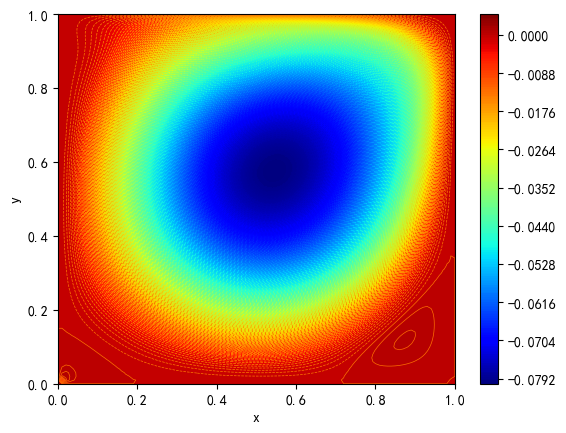

In [175]:
# 绘制流场图
plt.figure()
y = np.linspace(0,1,101)
x = np.linspace(0,1,101)
contourf = plt.contourf(x, y, Phi[0:101, 0:101].T,250, cmap='jet')
contour = plt.contour(x, y,Phi[0:101, 0:101].T,250,colors='black' ,linewidths=0.5)
plt.colorbar(contourf)
plt.set_cmap('jet')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

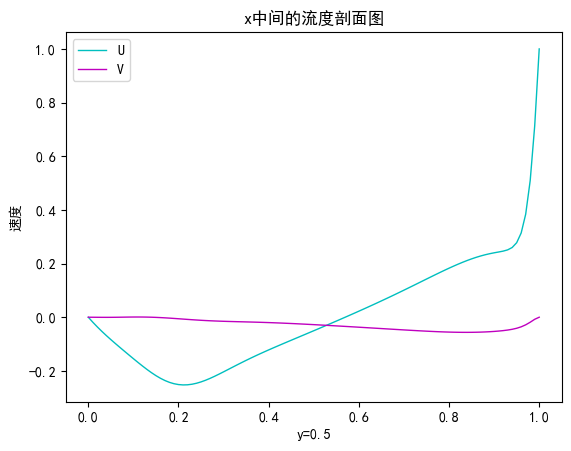

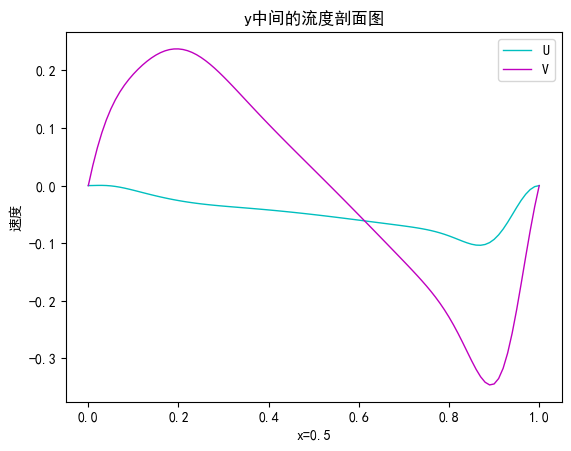

In [176]:
#计算流速并绘制中间剖面流速图
U = np.zeros((101,101))
V = np.zeros((101,101))

#计算流速
for i in range(1, 100):
    for j in range(1, 100):
        U[i, j] = (Phi[i, j + 1] - Phi[i, j - 1]) / (2 * h1)
        V[i, j] = (Phi[i + 1, j] - Phi[i - 1, j]) / (2 * h1)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

U_midx = U[round(50), 0:101]
V_midx = V[round(50), 0:101]
U_midy = U[0:101, round(50)]
V_midy = -V[0:101, round(50)]
U_midx[100]=1

#画图
plt.figure()
plt.plot(y, U_midx,'c',linewidth=1)
plt.plot(y, V_midx, 'm', linewidth=1)
plt.xlabel('y=0.5')
plt.ylabel('速度')
plt.title('x中间的流度剖面图')
plt.legend(['U', 'V'])

plt.figure()
plt.plot(x, U_midy, 'c', linewidth=1)
plt.plot(x, V_midy, 'm', linewidth=1)
plt.xlabel('x=0.5')
plt.ylabel('速度')
plt.title('y中间的流度剖面图')
plt.legend(['U', 'V'])

plt.show()

-0.0803709816610672
横坐标 (行): 0.55
纵坐标 (列): 0.58


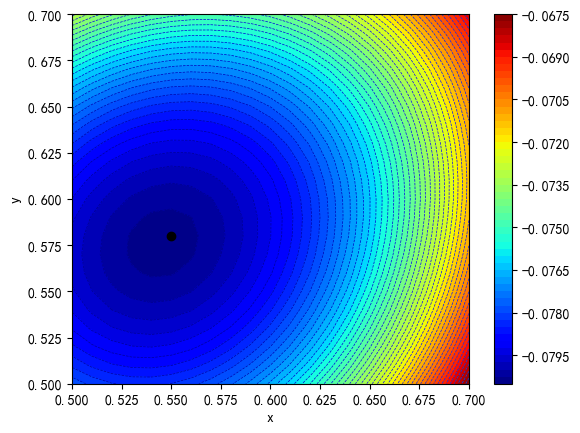

In [177]:
#寻找一次涡中心位置
min_Val = np.min(Phi)
print(min_Val)

min_Idx = np.argmin(Phi)
row_Idx, col_Idx = np.unravel_index(min_Idx, Phi.shape)
Centerx = (row_Idx)/(100)
Centery = (col_Idx)/(100)

print(f'横坐标 (行): {Centerx}')
print(f'纵坐标 (列): {Centery}')

# 绘制一次涡附近流场图
plt.figure()
x = np.linspace(0.5,0.7,21)
y = np.linspace(0.5,0.7,21)

contourf = plt.contourf(x, y, Phi[50:71, 50:71].T, 60, cmap='jet')
contour = plt.contour(x, y,Phi[50:71, 50:71].T, 60, colors='black', linewidths=0.5)
plt.colorbar(contourf)
plt.set_cmap('jet')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(Centerx, Centery, color='black', marker='o')
plt.show()

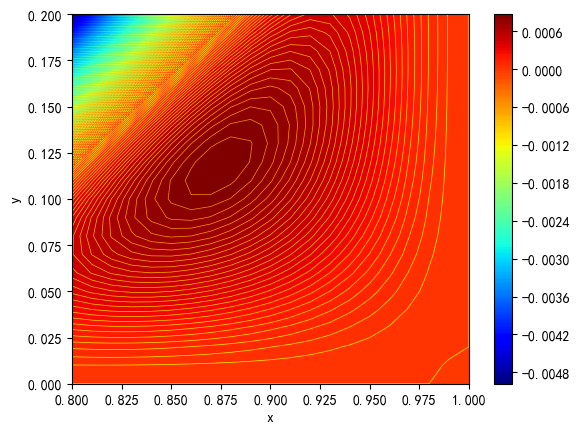

In [178]:
# 绘制二次涡附近流场图
plt.figure()
x = np.linspace(0.8,1,21)
y = np.linspace(0,0.2,21)

contourf = plt.contourf(x, y, Phi[80:101, 0:21].T, 200, cmap='jet')
contour = plt.contour(x, y,Phi[80:101, 0:21].T, 200, colors='black', linewidths=0.5)
plt.colorbar(contourf)
plt.set_cmap('jet')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

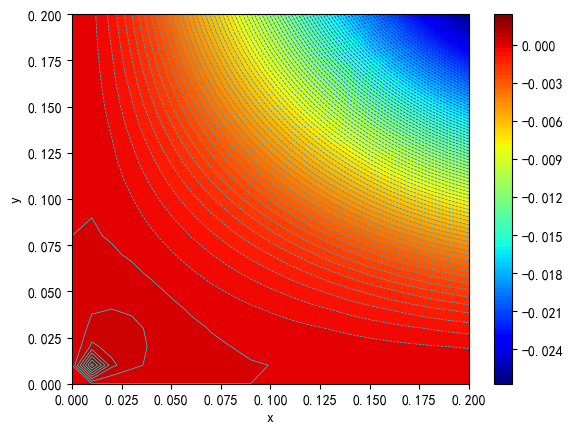

In [215]:
# 绘制三次涡附近流场图
plt.figure()
x = np.linspace(0,0.2,21)
y = np.linspace(0,0.2,21)

contourf = plt.contourf(x, y, Phi[0:21, 0:21].T, 100, cmap='jet')
contour = plt.contour(x, y,Phi[0:21, 0:21].T, 100, colors='black', linewidths=0.5)
plt.colorbar(contourf)
plt.set_cmap('jet')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [212]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
h1 = 1/100
h2 = 1/50
T = 1
dt = 1/100
w = 1.98
mu = 0.001

Omg = np.zeros((51,51))
Phi = np.zeros((51,51))

x = np.linspace(0,1,51)

vT = np.sin(np.pi * x) ** 2
vB = np.zeros(51)
vL = np.zeros(51)
vR = np.zeros(51) 

err = 1e-7
maxiter = 4000
Omg_err =10
iter =0

while Omg_err > err and iter < maxiter:
    iter += 1
    
    #更新边界条件
    for i in range(1, 50):
        Omg[0, i] = -2 * (Phi[1, i] - Phi[0, i] + vL[i-1] * h1) / h1 ** 2 
        Omg[-1, i] = -2 * (Phi[-2, i] - Phi[-1, i] + vR[i-1] * h1) / h1 ** 2 
    for j in range(0, 51):
        Omg[j, 0] = -2 * (Phi[j, 1] - Phi[j, 0] + vB[j-1] * h1) / h1 ** 2  
        Omg[j, -1] = -2 * (Phi[j, -2] - Phi[j, -1] + vT[j-1] * h1) / h1 ** 2
        
    #更新涡量场
    Omg_former =Omg.copy()
    for i in range(1,50):
        for j in range(1,50):
            Omg[i,j] = Omg_former[i,j] + dt*(mu*(Omg_former[i,j+1]+Omg_former[i,j-1]+Omg_former[i+1,j]+Omg_former[i-1,j]-4*Omg_former[i,j])/(h1**2)
            -(Omg_former[i+1,j]-Omg_former[i-1,j])*(Phi[i,j+1]-Phi[i,j-1])/(4*h1*h1)
            +(Omg_former[i,j+1]-Omg_former[i,j-1])*(Phi[i+1,j]-Phi[i-1,j])/(4*h1*h1))
    
    #更新流量场
    Phi_err =10000
    tol_err =1e-4
    iter_1 =0
    Phi_former =Phi.copy()
    Phi_step1 = Phi.copy()
    Phi_step2 =Phi.copy()
    iter_1 = 0
    
    while Phi_err > tol_err and iter_1 < 100:
        iter_1 += 1
        
        #从左上到右下迭代
        for i in range(1, 50):
            for j in range(1, 50):
                Phi_step1[i, j] = (Phi_step1[i - 1, j] + Phi_step1[i , j-1] + Phi_former[i, j + 1]
                                   + Phi_former[i+1,j] + Omg[i, j] * (h1 ** 2)) / 4
                
        #从右下到左上迭代
        for i in range(49, 0, -1):
            for j in range(49, 0, -1):
                Phi_step2[i, j] = (Phi_step2[i + 1, j] + Phi_step2[i, j+1] + Phi_step1[i-1, j ] 
                                   + Phi_step1[i, j - 1] + Omg[i, j] * (h1 ** 2)) / 4
                
        #松弛法迭代
        for i in range(1, 50):
            for j in range(1, 50):
                Phi[i, j] = (1 - w) * Phi[i, j] + w * Phi_step2[i, j]
        
        #计算迭代误差
        err_tmp = (Phi - Phi_former) ** 2
        Phi_err = np.sqrt(np.mean(err_tmp))
        
    #计算总误差
    err_tmp_O = (Omg - Omg_former) ** 2
    Omg_err = np.sqrt(np.mean(err_tmp_O))
                


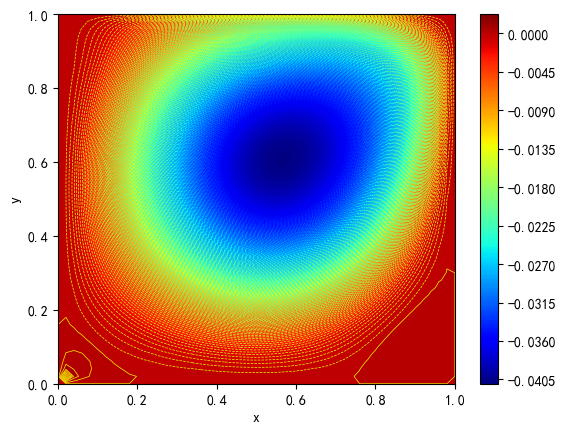

In [213]:
# 绘制流场图
plt.figure()
y = np.linspace(0,1,51)
x = np.linspace(0,1,51)
contourf = plt.contourf(x, y, Phi[0:51, 0:51].T,200, cmap='jet')
contour = plt.contour(x, y,Phi[0:51, 0:51].T,200,colors='black' ,linewidths=0.5)
plt.colorbar(contourf)
plt.set_cmap('jet')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [214]:
print(Phi[1,1])
print(Omg[1,1])

0.00224332806178678
-19.78242832471715
